# Loading dataset

In [1]:
import os, shutil
original_dataset_dir = '/home/shuvendu/Documents/datasets/Cat_and_Dog/train'
base_dir = 'E:\\Datasets\\Cat_and_Dog_small'

In [ ]:
os.mkdir(base_dir)

In [2]:
# Make the required datadir
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')


In [ ]:
os.mkdir(test_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Data Preprocessing

In [3]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


# Build the model

In [7]:
from keras import models, layers, metrics, losses, optimizers

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [9]:
# compile the model
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss = losses.binary_crossentropy,
              metrics = ['acc']
             )

# Training the model

In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 17s - loss: 0.6862 - acc: 0.5390 - val_loss: 0.6691 - val_acc: 0.5610
Epoch 2/30
100/100 [==============================] - 6s - loss: 0.6587 - acc: 0.6040 - val_loss: 0.6303 - val_acc: 0.6250
Epoch 3/30
100/100 [==============================] - 6s - loss: 0.6122 - acc: 0.6675 - val_loss: 0.5984 - val_acc: 0.6700
Epoch 4/30
100/100 [==============================] - 6s - loss: 0.5645 - acc: 0.7070 - val_loss: 0.5944 - val_acc: 0.6610
Epoch 5/30
100/100 [==============================] - 6s - loss: 0.5339 - acc: 0.7300 - val_loss: 0.5799 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 6s - loss: 0.5043 - acc: 0.7445 - val_loss: 0.5548 - val_acc: 0.7040
Epoch 7/30
100/100 [==============================] - 6s - loss: 0.4810 - acc: 0.7670 - val_loss: 0.5672 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 5s - loss: 0.4468 - acc: 0.7790 - val_loss: 0.5708 - val_acc: 0.7090
Epoch 9/30
100/

In [11]:
# save the model
model.save('cats_and_dogs_small_1.h5')

# Plotting data for observatoin

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Image augmentation: way of removing overfitting
The goal is that at training time,
your model will never see the exact same picture twice. This helps expose the model
to more aspects of the data and generalize better.

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=32,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
# Add a dropout layer to the model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [16]:
# Retrain the model
history = model.fit_generator(train_generator, 
                              validation_data=validation_generator, 
                              steps_per_epoch=100, 
                              epochs=100, 
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 19s - loss: 0.6919 - acc: 0.5169 - val_loss: 0.6807 - val_acc: 0.5958
Epoch 2/100
100/100 [==============================] - 17s - loss: 0.6743 - acc: 0.5791 - val_loss: 0.6541 - val_acc: 0.6128
Epoch 3/100
100/100 [==============================] - 17s - loss: 0.6726 - acc: 0.5809 - val_loss: 0.6436 - val_acc: 0.6339
Epoch 4/100
100/100 [==============================] - 17s - loss: 0.6461 - acc: 0.6247 - val_loss: 0.6207 - val_acc: 0.6546
Epoch 5/100
100/100 [==============================] - 18s - loss: 0.6294 - acc: 0.6438 - val_loss: 0.6651 - val_acc: 0.5647
Epoch 6/100
100/100 [==============================] - 18s - loss: 0.6156 - acc: 0.6619 - val_loss: 0.5997 - val_acc: 0.6682
Epoch 7/100
100/100 [==============================] - 57s - loss: 0.5999 - acc: 0.6613 - val_loss: 0.5591 - val_acc: 0.7055
Epoch 8/100
100/100 [==============================] - 62s - loss: 0.5979 - acc: 0.6787 - val_loss: 0.5576 - val_acc: 0.7107


100/100 [==============================] - 16s - loss: 0.3916 - acc: 0.8219 - val_loss: 0.4189 - val_acc: 0.8109
Epoch 67/100
100/100 [==============================] - 16s - loss: 0.3957 - acc: 0.8206 - val_loss: 0.4362 - val_acc: 0.7899
Epoch 68/100
100/100 [==============================] - 16s - loss: 0.3811 - acc: 0.8247 - val_loss: 0.4700 - val_acc: 0.7963
Epoch 69/100
100/100 [==============================] - 16s - loss: 0.3893 - acc: 0.8237 - val_loss: 0.4015 - val_acc: 0.8267
Epoch 70/100
100/100 [==============================] - 16s - loss: 0.3868 - acc: 0.8262 - val_loss: 0.3867 - val_acc: 0.8254
Epoch 71/100
100/100 [==============================] - 17s - loss: 0.3762 - acc: 0.8328 - val_loss: 0.4101 - val_acc: 0.8230
Epoch 72/100
100/100 [==============================] - 16s - loss: 0.3808 - acc: 0.8216 - val_loss: 0.4083 - val_acc: 0.8151
Epoch 73/100
100/100 [==============================] - 17s - loss: 0.3871 - acc: 0.8272 - val_loss: 0.4238 - val_acc: 0.8115
Epoch

In [17]:
model.save('cats_and_dogs_small_2.h5')

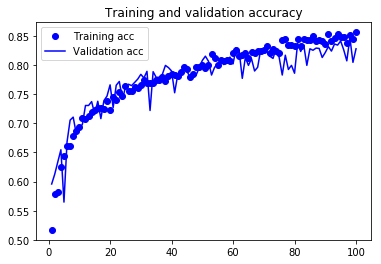

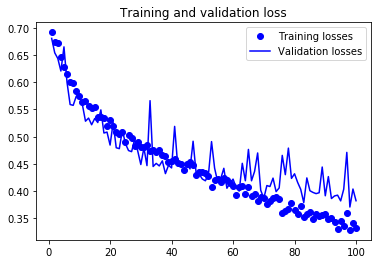

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()